# AirBnb Data Science Blog Post
Data was chosen from both the Boston and Seattle Datasets, specifically the "listings" dataset of each.

1. Is there a difference in price between the Boston and Seattle airbnb listings, does that align with the real estate market in both cities?

2a. What are top variables that influence price? 

2b. Does the airbnb data and answer to question 2a reflect on both seattle and boston real estate market?

3. What are some of the amenities that influence price the most for the Seattle dataset?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

%matplotlib inline

df_lst_seattle = pd.read_csv('listings.csv')
df_lst_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [2]:
df_lst_boston = pd.read_csv('./listings_boston.csv')
df_lst_boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
df_lst_seattle['price'].replace('[\$,]', '', regex=True, inplace=True)
df_lst_seattle['price'] = df_lst_seattle['price'].astype(float)


df_lst_boston['price'].replace('[\$,]', '', regex=True, inplace=True)
df_lst_boston['price'] = df_lst_boston['price'].astype(float)

price_boston = df_lst_boston['price'].mean()
price_seattle = df_lst_seattle['price'].mean()

print("Boston Average Price is" ,price_boston)
print("Seattle Average Price is",price_seattle)

Boston Average Price is 173.9258019525802
Seattle Average Price is 127.97616553169199


# Answer 
We can see the avergae price for an airbnb rental in Boston is 173.93 ,that is almost 46 more than the avergae price in Seattle for airbnb rentals. Suprisingly that is different from the real estate market for both cities. Average home prices for Boston according to Zillow are 596,400 and 728,300 for Seattle. 

Average Home Prices are from zillow.com 

Seattle:https://www.zillow.com/seattle-wa/home-values/

Boston:https://www.zillow.com/boston-ma/home-values/

In [4]:
def clean(df):
    
    
    y = df['price']
    
    X = df[['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bedrooms']]
    
    num_vars = X.select_dtypes(include=['int', 'float']).columns
    
    for col in num_vars:
        X[col].fillna((X[col].mean()), inplace=True)
    
    cat_vars = X.select_dtypes(include=['object']).columns
    
    for var in cat_vars:
        X = pd.concat([X.drop([var], axis=1), pd.get_dummies(X[var], drop_first=True)], axis=1)
    
    return X, y

In [5]:
X_sea, y_sea = clean(df_lst_seattle)

X_sea.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,accommodates,bedrooms,Alki,Arbor Heights,Atlantic,Belltown,Bitter Lake,Briarcliff,Brighton,Broadview,...,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Private room,Shared room
0,4,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,5.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,3.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
X_sea_train, X_sea_test, y_sea_train, y_sea_test = train_test_split(X_sea, y_sea, test_size = .25, random_state=42) 

lm_model_sea = LinearRegression(normalize=True) 
lm_model_sea.fit(X_sea_train, y_sea_train) 
        
y_sea_test_preds = lm_model_sea.predict(X_sea_test) 
"The r-squared score for the model is {} on {} values.".format(r2_score(y_sea_test, y_sea_test_preds), len(y_sea_test))

'The r-squared score for the model is 0.5584761774563144 on 955 values.'

In [7]:
def coef_weights(coefficients, X_train):
    
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

coef_sea_df = coef_weights(lm_model_sea.coef_, X_sea_train)

coef_sea_df.head(30)

,est_int,coefs,abs_coefs
89,Boat,231.038900,231.038900
95,Dorm,-121.820359,121.820359
62,Portage Bay,87.453352,87.453352
61,Pioneer Square,84.942073,84.942073
74,Southeast Magnolia,83.840365,83.840365
84,Westlake,76.221769,76.221769
33,Industrial District,74.202454,74.202454
59,Pike-Market,69.444966,69.444966
104,Shared room,-66.808564,66.808564
82,West Queen Anne,63.576022,63.576022


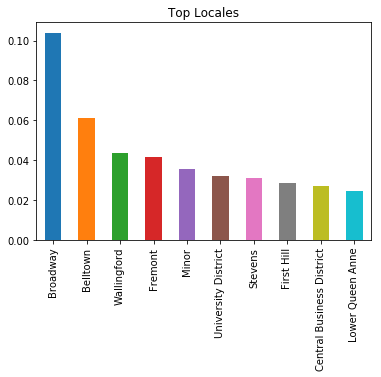

In [8]:
loc_vals = df_lst_seattle['neighbourhood_cleansed'].value_counts()

(loc_vals[0:10]/df_lst_seattle.shape[0]).plot(kind="bar");
plt.title("Top Locales");

In [9]:
X_bos, y_bos = clean(df_lst_boston)

X_bos.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,accommodates,bedrooms,Back Bay,Bay Village,Beacon Hill,Brighton,Charlestown,Chinatown,Dorchester,Downtown,...,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa,Private room,Shared room
0,4,2.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
X_bos_train, X_bos_test, y_bos_train, y_bos_test = train_test_split(X_bos, y_bos, test_size = .25, random_state=42) 

lm_model_bos = LinearRegression(normalize=True) 
lm_model_bos.fit(X_bos_train, y_bos_train) 
        
y_bos_test_preds = lm_model_bos.predict(X_bos_test) 
"The r-squared score for the model is {} on {} values.".format(r2_score(y_bos_test, y_bos_test_preds), len(y_bos_test))

'The r-squared score for the model is 0.2519293659329238 on 897 values.'

In [11]:
coef_bos_df = coef_weights(lm_model_bos.coef_, X_bos_train)

coef_bos_df.head(30)

,est_int,coefs,abs_coefs
22,South Boston Waterfront,165.322595,165.322595
28,Camper/RV,-145.212334,145.212334
14,Leather District,114.412319,114.412319
2,Back Bay,108.371604,108.371604
3,Bay Village,107.072947,107.072947
4,Beacon Hill,100.191714,100.191714
9,Downtown,90.807226,90.807226
11,Fenway,83.245502,83.245502
35,Other,79.800808,79.800808
7,Chinatown,73.179583,73.179583


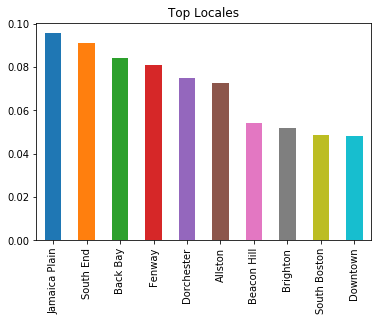

In [12]:
loc_vals = df_lst_boston['neighbourhood_cleansed'].value_counts()

(loc_vals[0:10]/df_lst_boston.shape[0]).plot(kind="bar");
plt.title("Top Locales");

# Answer 2
In general we can see for both Seattle and Boston data, the main influence on price is location. However we can also see some interesting details regarding how type of property influences price, and also learn something of each cities geography. In both the Boston and Seattle datasets, the smaller property types such as camper/rv and dorm have a negative influence on price, in other words they are the cheaper rentals available on airbnb. Interestly the more expensive property type in Seattle, boat, was not present in the Boston Dataset. This tells us geographically that Seattle not only has boats available for rent on airbnb, but they are also very popular and therefore more expensive to rent. 

Comparing the property locations that effect price positively and negatively for both datasets, to real estate markets in both cities, we can see the properties that are more expensive and positively influence price for airbnb are generally more expensive than average home price for each city, and the opposite is true for areas that negatively influence price. For example in Seattle we saw that Portage Bay had the most positive influence on price for property locations, and according to zillow, the average price per home in Portage Bay, Seattle is 1,290,900 , which of course is more than the average price per home for Seattle, which was 728,300. On the other end we can see the most negatively influenced location for Seattle was South Park, and the average price per home there was 415,400. 

The Boston data shows the same trend, Back Bay positvely influences airbnb rental price, and real estate estimates also show the avergae price per home is 1,056,900 , where the average price per home in Boston is 596,400. And the negatively influenced Hyde Park average price per home is 439,700. 

Average home prices were taken from zillow.com 

In [13]:
#Splititng the amenities column 
df_lst_seattle['TV'] = df_lst_seattle.amenities.str.contains("tv", case=False)
df_lst_seattle['Internet'] = df_lst_seattle.amenities.str.contains('internet|wireless', case=False)
df_lst_seattle['Parking'] = df_lst_seattle.amenities.str.contains('parking', case=False)
df_lst_seattle['Washer'] = df_lst_seattle.amenities.str.contains('washer', case=False)
df_lst_seattle['Dryer'] = df_lst_seattle.amenities.str.contains('dryer', case=False)
df_lst_seattle['AirCon'] = df_lst_seattle.amenities.str.contains('air condition|air conditioning', case=False)

In [14]:
def remove_outlier_col(df, threshold):
    
    outlier_columns = []
    outlier_value = []
    for i in list(df):
        if ((df[i].isnull().sum() / len(df[i])) > threshold):
           
            outlier_columns.append(i)
            outlier_value.append(df[i].isnull().sum())
        
    return outlier_columns, outlier_value

In [15]:
outlier_col, outlier_value = remove_outlier_col(df_lst_seattle, 0.2)


In [16]:
df_lst_seattle.drop(outlier_col, axis=1, inplace=True)


In [17]:
one_hot_encode = ['cancellation_policy', 'neighbourhood_group_cleansed', 'property_type', 'bed_type', 'host_identity_verified',
                  'host_response_time', 'host_is_superhost', 'room_type', 'instant_bookable']
    
make_numeric = ['host_response_rate', 'price', 'extra_people' ]

In [18]:
drop_num = ['id', 'host_id', 'latitude', 'longitude', 'review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_communication', 'review_scores_location', 'review_scores_checkin','review_scores_value', 
            'reviews_per_month', 'calculated_host_listings_count']

drop_object = [i for i in list(df_lst_seattle.select_dtypes(include=['object'])) if i not in make_numeric + one_hot_encode]

In [19]:
df_lst_seattle.drop(drop_num + drop_object, axis=1, inplace=True)

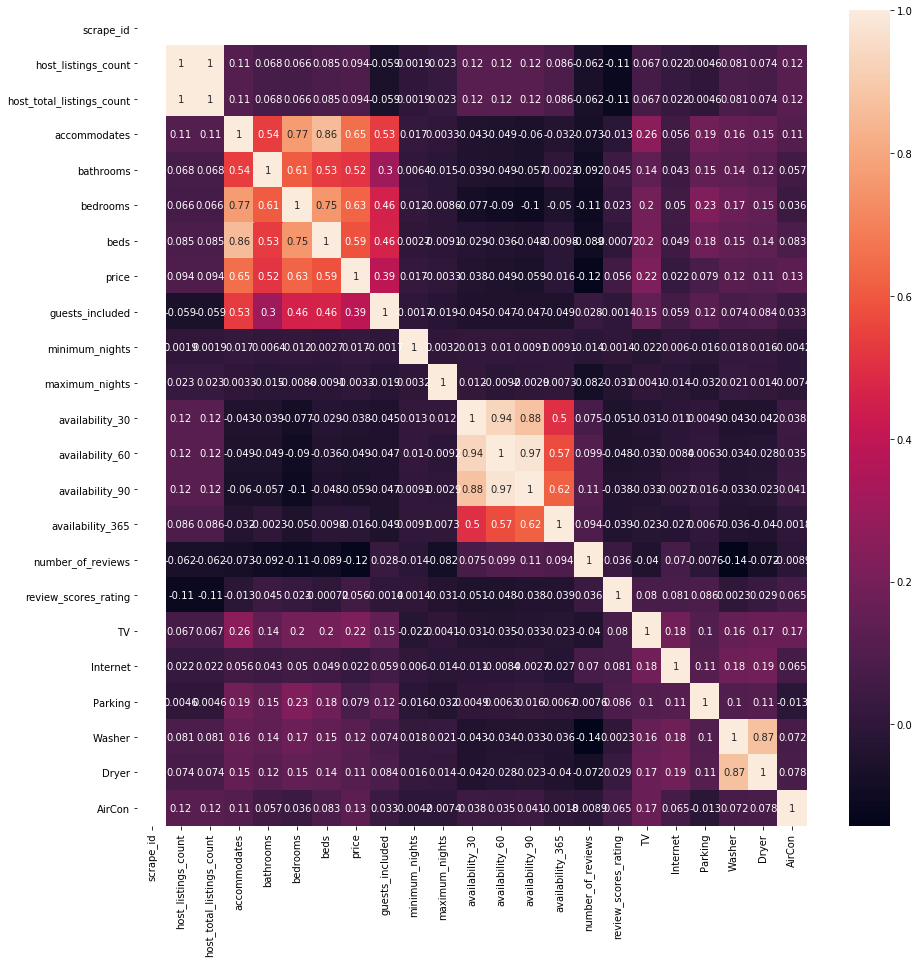

In [20]:
import matplotlib as plt

fig, ax = plt.pyplot.subplots(figsize=(15,15))
sns.heatmap(df_lst_seattle.corr(), annot=True, fmt='.2g');

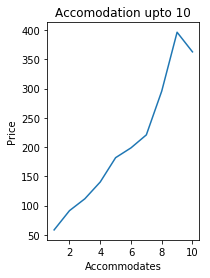

In [24]:
accom = pd.DataFrame(df_lst_seattle.groupby("accommodates")['price'].mean(), columns=['price'])
plt.pyplot.subplot(1,2,2)
plt.pyplot.title("Accomodation upto 10")
plt.pyplot.ylabel("Price")
plt.pyplot.xlabel("Accommodates")
plt.pyplot.plot(accom[:10])

# Answer 3
So we can see that the amount of people a location can accomodate is the highest influencing amentity on price. Surpisingly the relationship between accomodation and price is a near linear relationship, and really shows how strongly accomodation can effect the price for renting on Airbnb. However after a certain value, in this case 10, the relationship is no longer linear, and price flucuates rapidly. 